# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Cadenas de Markov de Tiempo discreto (2a. parte)

In [1]:
#using Pkg;Pkg.instantiate();Pkg.update()

## Cadenas de Markov de Tiempo Discreto

Recordemos que una cadena de Markov queda caracterizada por:

* Un espacio de estados $E=\{i,j,\ldots\}$ discreto *finito* o *infinito*

* Una matriz de transición $P$ que almacena las probabilidades de salto:

$$p_{ij} = P(X_{n+1}= j\mid X_n=i), \quad i,j\in E.$$

* Una distribución de probabilidad inicial $\pi^{(0)}$ que dice cómo se sortea el primer estado

## Espacio de estados infinito

En los ejemplos vistos antes, el espacio de estados siempre era *finito*, por lo que la matriz $P$ era una matriz cuadrada propia. Sin embargo puede ser útil considerar *espacio de estados infinito* (numerable).

> **Ejemplo:** Consideremos un sistema de cola-servidor. El servidor puede atender a lo sumo un trabajo por "slot"  (unidad de tiempo). Sin embargo los trabajos van llegando de manera aleatoria con cierta distribución (es decir, la cantidad de trabajos nuevos en cada "slot" es aleatoria). Este sistema a priori no tiene límite en la cantidad de trabajos en espera 

Veremos que la teoría es análoga a la que ya estudiamos para el caso finito. Para ello consideremos el siguiente ejemplo.

## Paseo al azar con barrera

En este ejemplo, el espacio de estados es $E = \{0, 1, 2,\ldots\}$, y una vez que el proceso se encuentra en $X_n = k$, entonces salta a $k + 1$ con probabilidad $p$ y a $k − 1$ con probabilidad $q=1 − p$, excepto en $X_n = 0$, donde en ese caso permanece allí (barrera).

El diagrama de estados es:
![Ejemplo](../images/random_walk_barrier.png)

**Observación:** Si $0<p<1$ la cadena puede en principio recorrer todo el espacio de estados.

**Pregunta:** ¿que ocurre si $p=0$ o si $p=1$?

### Matriz de transición

La matriz de transicion correspondiente al grafo anterior es:

$$P = \begin{pmatrix}
1-p & p & 0 & 0 & \cdots \\
1-p & 0 & p & 0 & \cdots \\
0 & 1-p & 0 & p & \cdots \\
\vdots & \ddots & \ddots & \ddots & \cdots 
\end{pmatrix}$$

Esta matriz es infinita, pero de todos modos podemos plantear formalmente las ecuaciones de balance global para hallar el estado estacionario.

Recordemos que la ecuación de balance global es $\pi = \pi P$.

### Ecuaciones de balance

A partir de lo anterior comenzamos a escribir las ecuaciones de balance:

$$\begin{eqnarray}
\pi_0 (1-p) + \pi_1 (1-p) &= \pi_0 \\
\pi_0 p + \pi_2 (1-p) &= \pi_1 \\
\pi_1 p + \pi_3 (1-p) &= \pi_2 \\
\pi_2 p + \pi_4 (1-p) &= \pi_3 \\
&\vdots
\end{eqnarray}$$

 * De la primera ecuación concluimos que $\pi_0 p = \pi_1 (1-p)$
 * Sumando las dos primeras nos queda: $\pi_1 (1-p) + \pi_2 (1-p) = \pi_1 \Rightarrow \pi_1 p = \pi_2 (1-p)$.
 * Sumando las tres primeras nos queda: $\pi_2 (1-p) + \pi_3 (1-p) = \pi_2 \Rightarrow \pi_2 p = \pi_3 (1-p)$.


### Distribución invariante

Repitiendo el procedimiento anterior llegamos a la siguiente recurrencia para $\pi$:

$$\pi_k p = \pi_{k+1} (1-p) \quad \forall k\geqslant 0.$$

**Interpretación:** las ecuaciones anteriores se denominan *balance local* ya que puede verse como un balance entre cada par de estados. En las cadenas "en línea" este truco siempre funciona.

Levantando la recurrencia se tiene que:

$$\pi_k = \pi_0 \left(\frac{p}{1-p}\right)^k.$$

Por lo tanto la distribución invariante es de forma geométrica (de razón $p/(1-p)$. Sin embargo, aún debemos determinar $\pi_0$ para completar la solución.

Para hallar $\pi_0$ usamos que el vector $\pi$ debe ser una distribución de probabilidad, de donde:

$$\sum_{k=0}^\infty \pi_k = 1.$$

Sustituyendo el $\pi_k$ hallado antes queda:

$$\pi_0\sum_{k=0}^\infty  \left(\frac{p}{1-p}\right)^k = 1.$$

En este punto se abren dos posibilidades:

 * Si la razón de la geométrica es menor a $1$, entonces la suma converge y podemos "despejar" $\pi_0$.
 * Si la razón de la geomtrica es mayor a $1$, la serie diverge, por lo que *no hay ningún $\pi_0$ solución*.

### Caso 1: cadena recurrente o ergódica

Supongamos que $p/(1-p)<1$ o equivalentemente, $p<1-p$, es decir, $p<1/2$. Entonces:

$$\sum_{k=0}^\infty  \left(\frac{p}{1-p}\right)^k = \frac{1}{1-\frac{p}{1-p}} = \frac{1-p}{1-2p}.$$

Despejando $\pi_0$ en la ecuación anterior queda:

$$\pi_0 = \frac{1-2p}{1-p} \quad \pi_k = \left(\frac{1-2p}{1-p}\right)\left(\frac{p}{1-p}\right)^k.$$

Notemos que en este caso hay una única solución a las ecuaciones de balance, la misma es positiva para todo $k$ y decae geométricamente. Grafiquemosla para algunos valores de $p$.

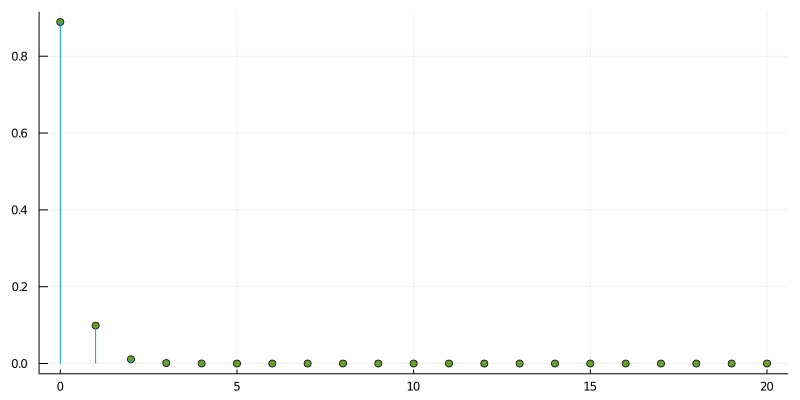

In [2]:
using Plots
default(size=(800,400), legend=:none)

#defino la función anterior
pi(k,p) = (1-2*p)/(1-p) * (p/(1-p))^k

#Elijo un valor de $p$ "bajo"
p=0.1

#vector de k
k=(0:20)

plot(k,pi.(k,p),line=:stem, marker=:circle)

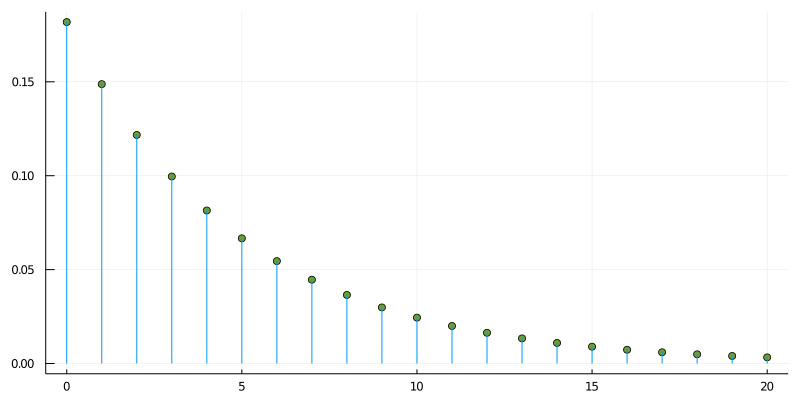

In [3]:
#Para otro valor de p
p=0.45

plot(k,pi.(k,p),line=:stem, marker=:circle)

### Caso 2: cadena transitoria

Si $p\geqslant 1/2$ (o bien $p/(1-p) \geqslant 1$, entonces **no existe solución** a las ecuaciones de blaance que además sea una distribución de probabilidad.

**Conclusión:** en este caso la cadena no llega a régimen. ¿Qué quiere decir esto desde el punto de vista de las trayectorias?

Para ello, construyamos un código que permita simular el paseo al azar y analicemos los resultados.

In [4]:
#Simula el paseo al azar con barrera. Toma como parámetros:
#p=prob. de avance a la derecha, 
#x0=condición inicial (determinística)
#Tfinal= no. de pasos a simular.

function paseoConBarrera(p,x0,Tfinal)
    
    X=zeros(Tfinal)
    X[1]=x0;
    x=x0;
    
    for i=2:Tfinal
        u=rand()
        if u<p
            x=x+1;
        else
            if x>0
                x=x-1;
            end
        end
    
        X[i]=x;
    end
    
    return X;

end

paseoConBarrera (generic function with 1 method)

### Simulación

Simulemos esta cadena con dos valores distintos de p y grafiquemos la evolución.

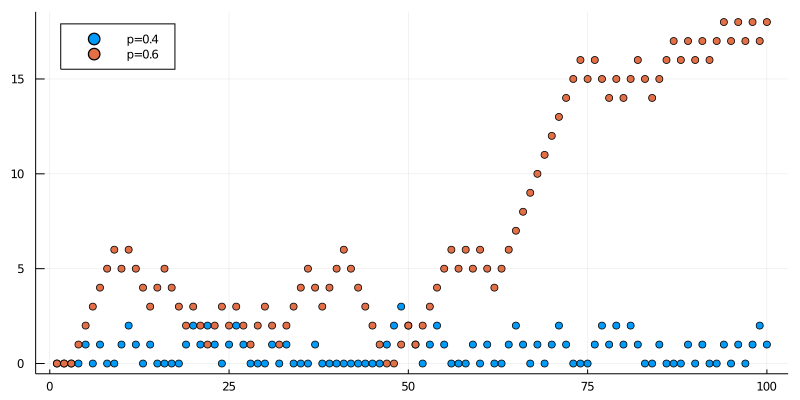

In [5]:
Tfinal=100;

X1=paseoConBarrera(0.4,0,Tfinal)
X2=paseoConBarrera(0.6,0,Tfinal)

scatter((1:Tfinal),X1,label="p=0.4", legend=:topleft)
scatter!((1:Tfinal),X2,label="p=0.6")

### Distribución en régimen

Simulemos ahora la cadena con $p = 0.45<1$ y un tiempo largo para observar el comportamiento.

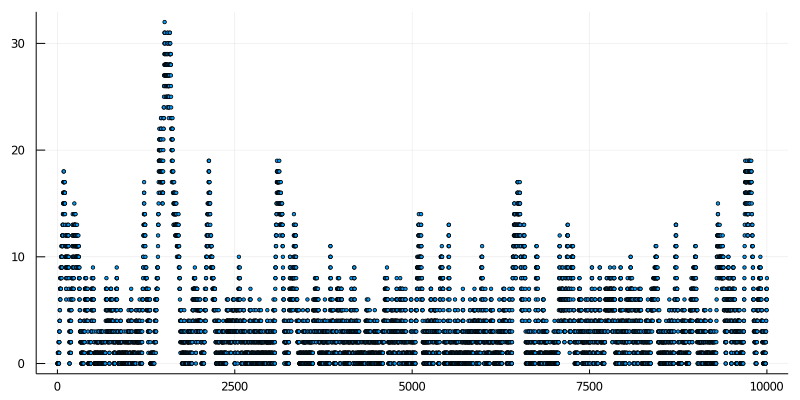

In [6]:
Tfinal=10000;
p=0.45;
x=0;
X=paseoConBarrera(p,x,Tfinal)
scatter((1:Tfinal),X,markersize=2)

El tiempo que pasa la cadena en cada estado debería coincidir con la distribución de régimen calculada más
arriba. Realicemos una estimación del tiempo que se visita cada estado.

Para ello, recorremos todos los valores observados de $X$ y contamos la proporción (relativa a `Tfinal`) de
veces que la cadena estaba en dicho estado y lo comparamos con la teórica.

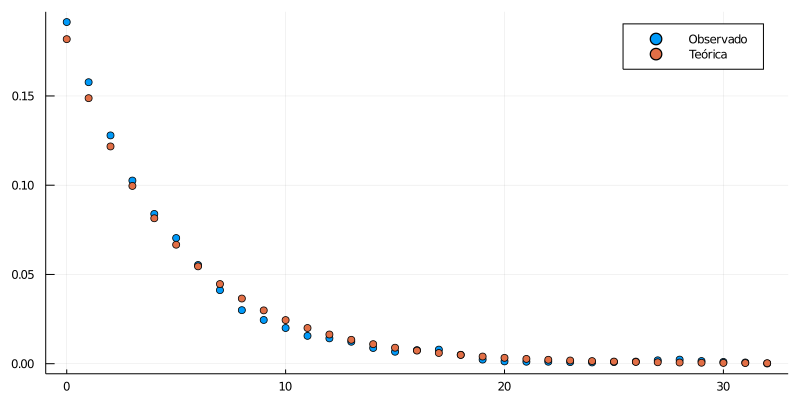

In [7]:
#Miro el rango recorrido por X
k=0:maximum(X);

pi_est=zeros(size(k));

for j=1:length(k)
    pi_est[j]=sum(X.==k[j])/Tfinal;
end

scatter(k,pi_est, label="Observado",legend=:topright)

pi_teo = pi.(k,p)
scatter!(k,pi_teo, label="Teórica")

### Observación

El comportamiento en régimen no depende de la condición inicial. Para verificarlo, utilicemos la misma
cadena pero comenzando en diferentes estados iniciales.

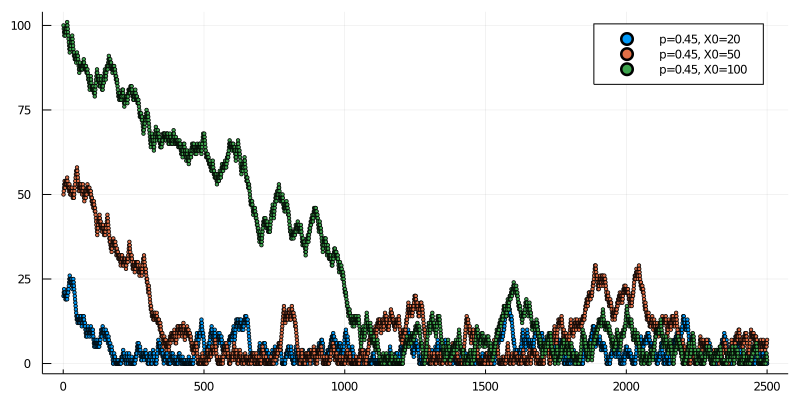

In [8]:
p=0.45
Tfinal=2500
X1=paseoConBarrera(p,20,Tfinal)
X2=paseoConBarrera(p,50,Tfinal)
X3=paseoConBarrera(p,100,Tfinal)
scatter((1:Tfinal),X1,label="p=0.45, X0=20", markersize=2, legend=:topright)
scatter!((1:Tfinal),X2,label="p=0.45, X0=50", markersize=2)
scatter!((1:Tfinal),X3,label="p=0.45, X0=100", markersize=2)

### El caso $p>1/2$

Simulemos nuevamente el caso $p>1/2$ para diferentes valores de $p$.

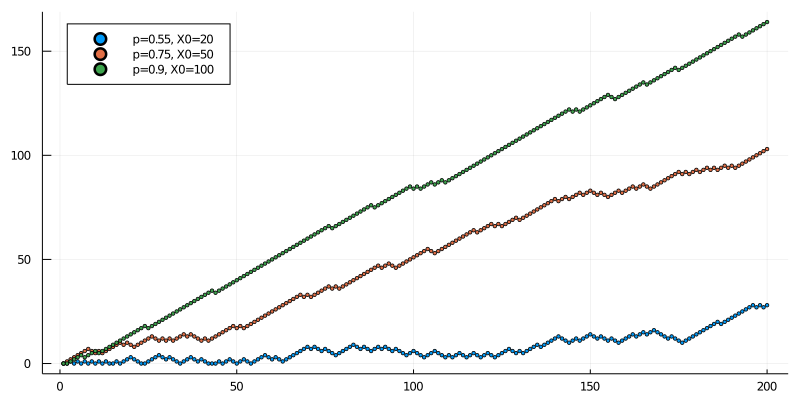

In [9]:
Tfinal=200
X1=paseoConBarrera(0.55,0,Tfinal)
X2=paseoConBarrera(0.75,0,Tfinal)
X3=paseoConBarrera(0.9,0,Tfinal)
scatter((1:Tfinal),X1,label="p=0.55, X0=20", markersize=2, legend=:topleft)
scatter!((1:Tfinal),X2,label="p=0.75, X0=50", markersize=2)
scatter!((1:Tfinal),X3,label="p=0.9, X0=100", markersize=2)

**Observación:** En este caso ($p>1/2$) la cadena se dice *transitoria*. Si bien hay probabilidad positiva de ir de cualquier estado a cualquier otro, el proceso eventualmente *deja de visitar todos los estados*.

Esto obviamente es posible porque el espacio de estados es *infinito* y la cadena se escapa lentamente a $+\infty$.

Obviamente aquí la cadena no es ergódica, y no tiene sentido calcular su estado de régimen.

Las nociones de ergodicidad, recurrencia y transitoriedad las volveremos a analizar en detalle más adelante.


## Ejercicio 1

Se considera una máquina en una fábrica que funciona continuamente. En cada día, la máquina tiene probabilidad de romperse. Cuando se rompe, puede llevar varios días repararla. Más específicamente, hay una probabilidad $p_1$ de que se rompa y esté rota un día, $p_2$ de que lo esté dos días o $p_3$ de tres días. Suponemos que $p_1+p_2+p_3\leqslant 1$.

Sea $X_n =$“días que faltan hasta que la máquina funcione nuevamente”, donde $X_n = 0$ representa que la máquina funciona correctamente.

1. Modele $X_k$ como una cadena de Markov. Dé el diagrama de estados y transiciones.
2. Para $p_1 = p_2 = p_3 = 1/6$ dé la matriz de transiciones $P$ y calcule la distribución de régimen $\pi$.
3. Para el caso anterior, calcule la proporción de días que la máquina funciona correctamente.
4. Simule la cadena anterior usando las funciones ya vistas y compare la distribución invariante con la hallada.


## Ejercicio 2

Modifique el paseo al azar anterior para que la probabilidad de ir de $k\to k+1$ sea $p$ y $k\to k-1$ sea $q$ con $p$ y $q$ tales que $p+q\leqslant 1$. Utilizando las simulaciones, identifique cuál es la condición para que exista régimen,